In [2]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot 
import statsmodels.formula.api as sm

In [3]:
#open csv file
data = pd.read_csv('slr12.csv', delimiter=';')
display(data.head())


,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [4]:
FrqAnual = data['FrqAnual']
CusInic = data['CusInic']

In [5]:
#Transform FrqAnual to array
def FrqAnual_to_array(FrqAnual):
    FrqAnual_array = np.zeros(len(FrqAnual))
    for i in range(len(FrqAnual)):
        FrqAnual_array[i] = FrqAnual[i]
    return FrqAnual_array

FrqAnual = FrqAnual_to_array(FrqAnual)

In [6]:
regression = LinearRegression()
FrqAnual = FrqAnual.reshape(-1, 1) #needed for sklearn.linear_model.LinearRegression
regression.fit(FrqAnual, CusInic)
predictions = regression.predict(FrqAnual)

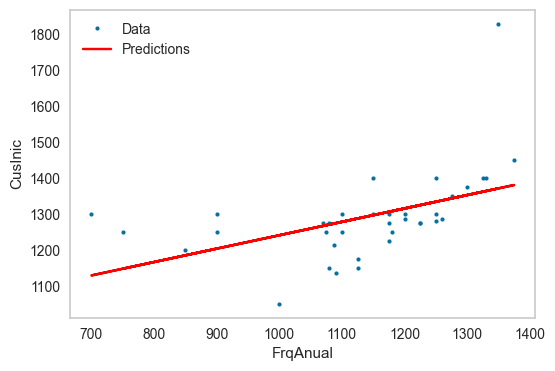

In [7]:
#Plot results
plt.figure(figsize=(6,4))
plt.plot(FrqAnual,CusInic, 'ob', markersize = 3, label = 'Data')
plt.plot(FrqAnual, predictions, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')
plt.xlabel('FrqAnual')
plt.ylabel('CusInic')
plt.grid(False)

In [9]:
regression_analysis = sm.ols(formula = 'CusInic ~ FrqAnual', data = data)
regr_results = regression_analysis.fit()
regr_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CusInic   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Sat, 28 Jan 2023   Prob (F-statistic):            0.00327
Time:                        11:50:12   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    867.6042    135.071      6.423      0.000     593.107    1142.102
FrqAnual       0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

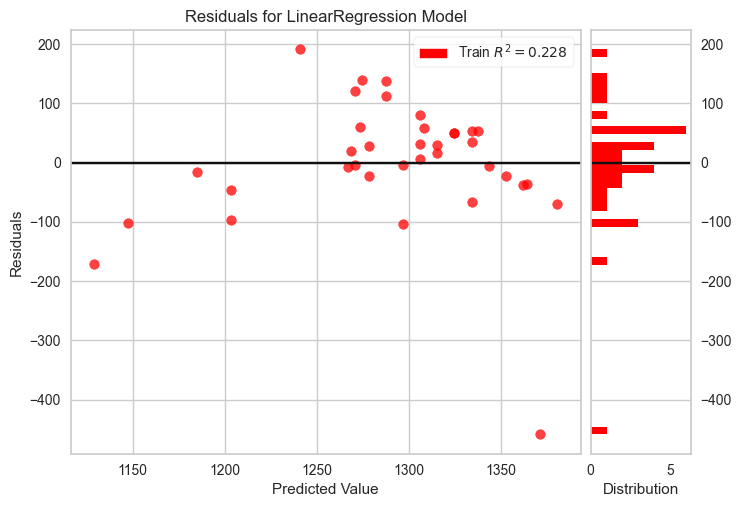

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
# Residuals visualization
residuals = ResidualsPlot(regression, hist = True, train_color = 'red')
residuals.fit(FrqAnual, CusInic)
residuals.poof()

In [11]:
r = np.corrcoef(data.iloc[:,0], data.iloc[:,1])
r = r[0,1]

if r > 0:
    correl = 'positively'
else:
    correl = 'negatively'
    
if (abs(r)==1.0):
    inten = 'perfect'
elif (abs(r)>0.9):
    inten = 'very strong'
elif (abs(r)>0.7) :
    inten = 'strong'
elif (abs(r)>0.5) :
    inten = 'moderate'
elif (abs(r)>0.3) :
    inten = 'weak'
elif (abs(r)<=0.3) :
    inten = 'very weak'
    
print('The linear correlation between FrqAnual and CusInic is {:.11s} {:.11s} (r = {:.3f})'.format(correl,inten,r))

The linear correlation between FrqAnual and CusInic is positively weak (r = 0.477)
